In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7'
output = 'fifa-19-cleaned-dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7
To: /content/fifa-19-cleaned-dataset.csv
100%|██████████| 5.76M/5.76M [00:00<00:00, 269MB/s]


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Mean Club Value,Mean Nationality Value
0,31.0,94.0,94,110500000.0,565000.0,2202,0,5.0,4.0,4.0,2021,170.18,72.121128,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,2.674569e+07,3.282686e+06
1,33.0,94.0,94,77000000.0,405000.0,2228,1,5.0,4.0,5.0,2022,187.96,83.007336,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,2.912614e+07,5.312205e+06
2,26.0,92.0,93,118500000.0,290000.0,2143,1,5.0,5.0,5.0,2022,175.26,68.038800,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,2.238056e+07,4.660354e+06
3,27.0,91.0,92,102000000.0,355000.0,2281,1,4.0,5.0,4.0,2023,180.34,69.853168,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,2.558914e+07,5.253653e+06
4,27.0,91.0,91,93000000.0,340000.0,2142,1,4.0,4.0,4.0,2020,172.72,73.935496,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,1.935554e+07,5.253653e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19.0,47.0,65,60000.0,1000.0,1307,1,1.0,2.0,2.0,2019,175.26,60.781328,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,143000.0,1.902083e+05,1.621614e+06
14739,19.0,47.0,63,60000.0,1000.0,1098,1,1.0,2.0,2.0,2020,190.50,77.110640,47.0,47.0,47.0,41.0,44.0,44.0,44.0,41.0,42.0,42.0,42.0,40.0,37.0,37.0,37.0,40.0,32.0,33.0,33.0,33.0,32.0,31.0,34.0,34.0,34.0,31.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,113000.0,2.677083e+05,1.174366e+06
14740,16.0,47.0,67,60000.0,1000.0,1189,1,1.0,3.0,2.0,2021,172.72,67.131616,47.0,47.0,47.0,47.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,46.0,40.0,40.0,40.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,30.0,30.0,30.0,35.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,165000.0,1.886000e+05,1.621614e+06
14741,17.0,47.0,66,600

In [ ]:
def load_data(df, target_column, columns_to_drop=[]):
    X = df.drop(columns_to_drop + [target_column], axis=1)  # características
    y = df[target_column]  # variable a predecir
    return X, y

In [ ]:
def train_decision_tree(X_train, y_train):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    return dt

In [ ]:
def train_random_forest(X_train, y_train):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    return rf

In [ ]:
def evaluate_model(model, X_test, y_test, margin = 0.1):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error absoluto medio (MAE): {mae:.4f}")
    print(f"Error cuadrático medio (MSE): {mse:.4f}")

    absolute_difference = np.abs(y_test - y_pred)
    # Encuentra cuáles diferencias son menores o iguales al 10% del valor real
    within_margin = absolute_difference <= margin * y_test

    # Calcular el porcentaje de predicciones dentro del margen de error
    percentage = np.mean(within_margin) * 100

    print(f"Porcentaje de predicciones dentro del margen de error del {margin*100}%: {percentage:.2f}%")
    return mae, mse, percentage

# Preparación de los modelos

Ya probamos, con lo datos limpiados, cuales son los modelos que parecen más adecuados (Decision Tree y Random Forest), así que vamos a prepararlos para lo siguiente

In [ ]:
X, y = load_data(df, 'Value')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree_model = train_decision_tree(X_train, y_train)

evaluate_model(decision_tree_model, X_test, y_test)

Error absoluto medio (MAE): 212962.0210
Error cuadrático medio (MSE): 759766929467.6161
Porcentaje de predicciones dentro del margen de error del 10.0%: 77.79%


(212962.02102407595, 759766929467.6161, 77.78908104442183)

In [ ]:
random_forest_model = train_random_forest(X_train, y_train)

evaluate_model(random_forest_model, X_test, y_test)

Error absoluto medio (MAE): 168736.1139
Error cuadrático medio (MSE): 472844833075.6188
Porcentaje de predicciones dentro del margen de error del 10.0%: 86.16%


(168736.11393692778, 472844833075.61884, 86.1648016276704)

# Pruebas de importancia de características

Ahora, con estos modelos, vamos a probar cuales son las características (columnas) que más influyen en las decisiones de los modelos

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, X):
    # Obtener la importancia de las características
    importances = model.feature_importances_

    # Obtener nombres de las características
    feature_names = X.columns

    # Ordenar las importancias de manera descendente
    indices = importances.argsort()[::-1]

    # Mostrar todas las características en el gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Importancia de las Características")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.show()

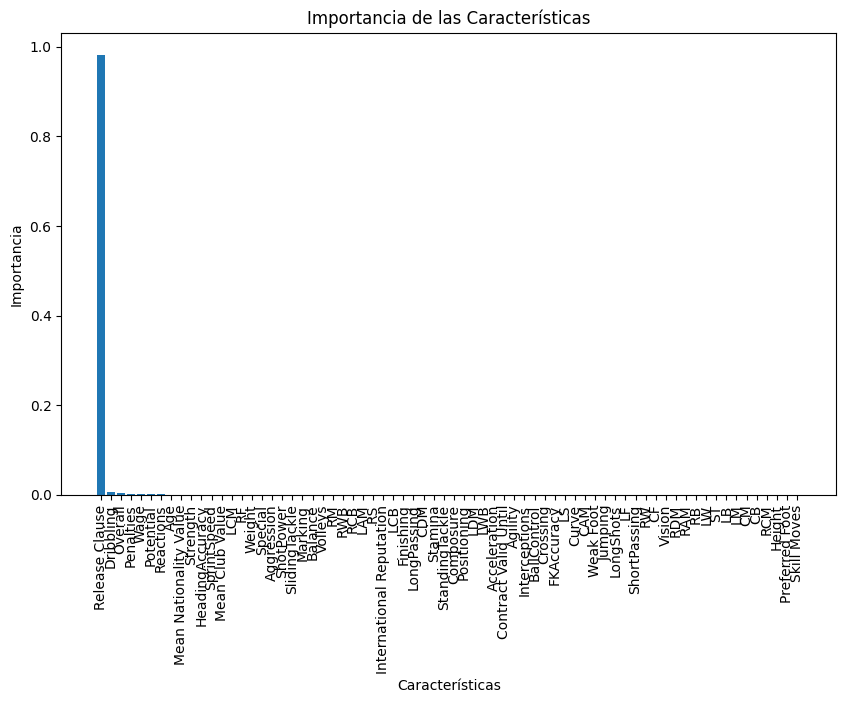

In [ ]:
# Para el decision tree
plot_feature_importance(decision_tree_model, X)

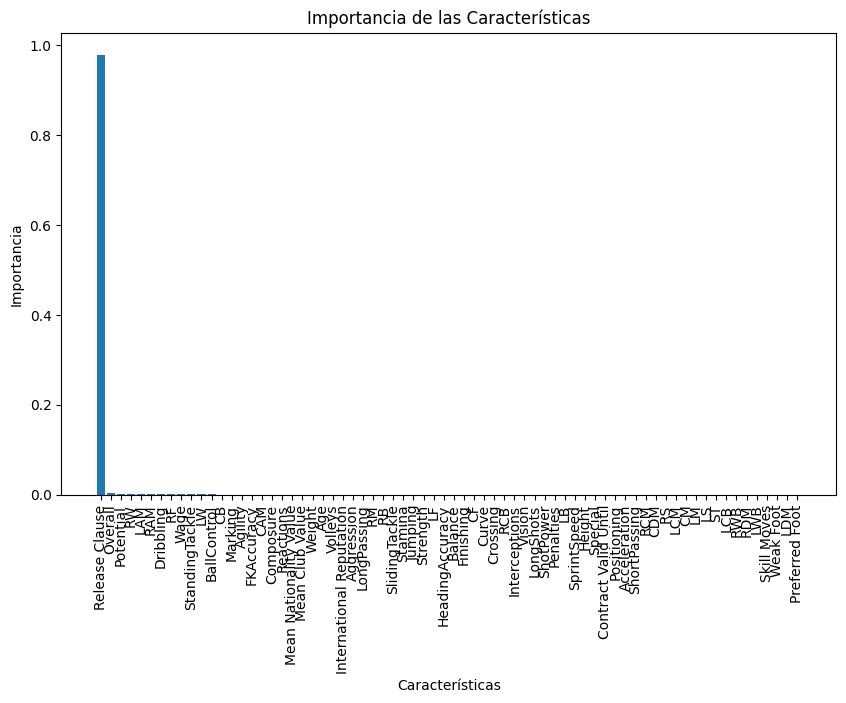

In [ ]:
# Para el decision tree
plot_feature_importance(random_forest_model, X)

Notamos que la columna de 'Release Clause' es la más importante para el modelo. Esto (desde un punto de vista personal) no debería ser así, así que vamos a probar a eliminarla

In [ ]:
def preparation_process(df, columns_to_drop = []):
  # Carga de datos
  X, y = load_data(df, 'Value', columns_to_drop)

  # Separar valores de prueba y valores de entrenamiento
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Entrenamiento y evaluación decision tree
  print("Decision Tree")
  decision_tree_model = train_decision_tree(X_train, y_train)
  evaluate_model(decision_tree_model, X_test, y_test)

  plot_feature_importance(decision_tree_model, X)

  # Entrenamiento y evaluación random forest
  print("\nRandom Forest")
  random_forest_model = train_random_forest(X_train, y_train)
  evaluate_model(random_forest_model, X_test, y_test)

  plot_feature_importance(random_forest_model, X)

  return [X, decision_tree_model, random_forest_model]


In [ ]:
X.columns

Index(['Age', 'Overall', 'Potential', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause', 'Mean Club Value', 'Mean Nationality Value'],
      dtype='object')

Decision Tree
Error absoluto medio (MAE): 200252.6280
Error cuadrático medio (MSE): 1920095108511.3599
Porcentaje de predicciones dentro del margen de error del 10.0%: 85.89%


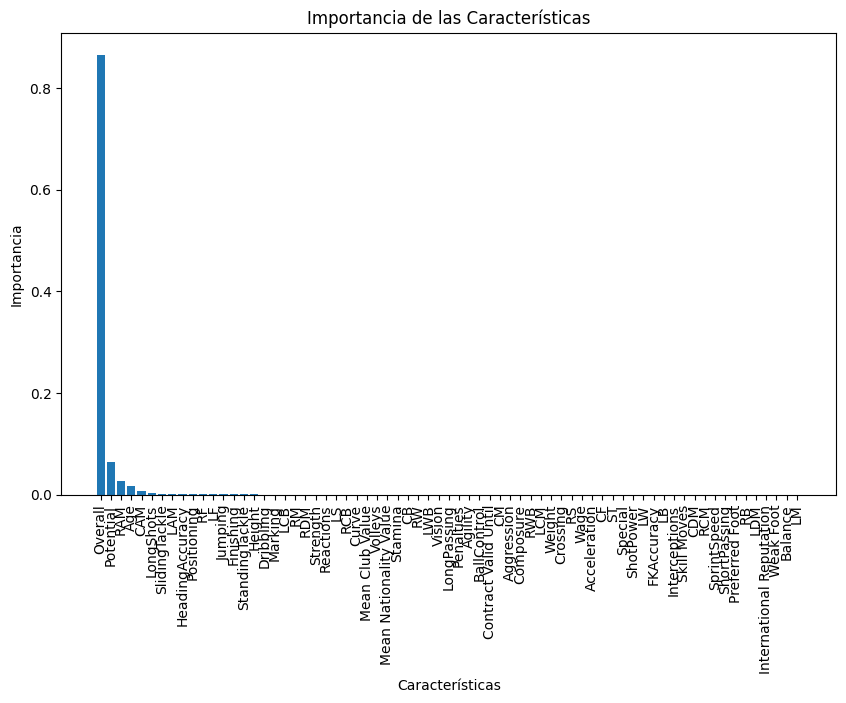


Random Forest
Error absoluto medio (MAE): 159056.2394
Error cuadrático medio (MSE): 1018329310509.4948
Porcentaje de predicciones dentro del margen de error del 10.0%: 89.69%


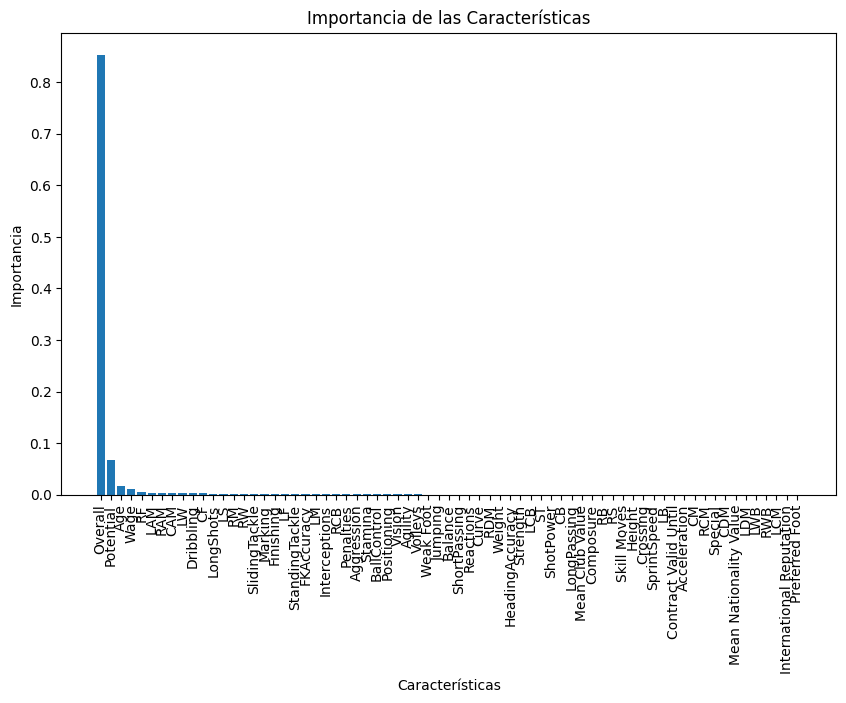

In [ ]:
preparation_process(df, columns_to_drop = ['Release Clause'])

Notamos que mejoró aproximandamente un 5% (teniendo en cuenta los criterios establecidos).

Gracias a esto decidimos dejar el modelo sin la columna 'Release Clause'.

Ahora, podemos notar en el gráfico de importancia de características que existen una gran cantidad de columnas que no aportan nada (o casi nada al modelo). Sin embargo, estas son muy variantes, es decir, son diferentes para cada tipo de modelo e incluso para cada conjunto de hiperparámetros del mismo modelo. Debido a esto vamos a dedicar un notebook específico para desarrollar los procesos específicos de cada tipo de modelo.